In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score

class SigmoidNeuron:
    
    """Creates a Perceptron.
    
    Initialiazes a Perceptron with two weights and one bias.
    
    Attributes:
        w_1: An integer/float indicating the first weight.
        w_2: An integer/float indicating the second weight.
        b: An integer/float indicating the bias.
    """
    
    def __init__(self, w, b):
        """Inits the Perceptron with 'w_1' and 'w_2' as weights, and 'b' as bias."""
        self.w = w
        self.b = b
        
    def op(self, x_1, x_2):
        """Performs the weighted sum of a Perceptron and adds it the bias."""
        out = self.w[0] * x_1 + self.w[1] * x_2 + self.b
        z = self.sigmoid(out)
        if z > 0.5:
            return 1
        return 0
    
    def sigmoid(self, z):
        """Definition of the sigmoid function"""
        return 1/(1 + np.exp(-z))
    
    def train(self, lr, n_inputs):
        """Trains the sigmoid perceptron with a specified learning rate and
        a number of inputs"""
        for iteration in range(n_inputs):
            an_X = random.uniform(-25.0, 25.0)
            an_Y = random.uniform(-25.0, 25.0)
            if f(an_X) >= an_Y:
                desired_output = 1
            else:
                desired_output = 0
            inputs = np.array([an_X, an_Y])
            weights = np.array(self.w)
            if self.sigmoid(np.dot(inputs, weights) + self.b) > 0.5:
                actual_output = 1
            else:
                actual_output = 0
            diff = desired_output - actual_output
            for n in range(len(inputs)):
                self.w[n] = self.w[n] + (lr * inputs[n] * diff)
            self.b = self.b + (lr * diff)
        
    
    def test(self):
        """Tests a trained sigmoid perceptron."""
        np.random.seed(42)
        precision = 0
        desired_outputs = []
        actual_outputs = []
        for iteration in range(250):
            an_X = random.uniform(-25.0, 25.0)
            an_Y = random.uniform(-25.0, 25.0)
            inputs = np.array([an_X, an_Y])
            weights = np.array(self.w)
            if f(an_X) >= an_Y:
                desired_output = 1
            else:
                desired_output = 0
            desired_outputs.append(desired_output)
            if self.sigmoid(np.dot(inputs, weights) + self.b) > 0.5:
                actual_output = 1
            else:
                actual_output = 0
            actual_outputs.append(actual_output)
        precision = precision_score(desired_outputs, actual_outputs)
        return precision
        

def create_OR():
    """Creates and returns a Perceptron that emulates the 'OR' logic operator"""
    return SigmoidNeuron([1, 1], -0.5)

def create_AND():
    """Creates and returns a Perceptron that emulates the 'AND' logic operator"""
    return SigmoidNeuron([1, 1], -1.5)

def create_NAND():
    """Creates and returns a Perceptron that emulates the 'NAND' logic operator"""
    return SigmoidNeuron([-2, -2], 3)

def summing_numbers(x_1, x_2):
    """Add two bits
    Calculates the addition between two bits.
    Args:
      x_1:
        First bit of the addition.
      x_2:
        Second bit of the addition.
    Returns:
      The result of the addition, plus the carry bit.
    """  
    NAND = create_NAND()
    op_1 = NAND.op(x_1, x_2)
    op_2 = NAND.op(x_1, op_1)
    op_3 = NAND.op(op_1, x_2)
    carry_bit = NAND.op(op_1, op_1)
    sum_ = NAND.op(op_2, op_3)
    return sum_, carry_bit

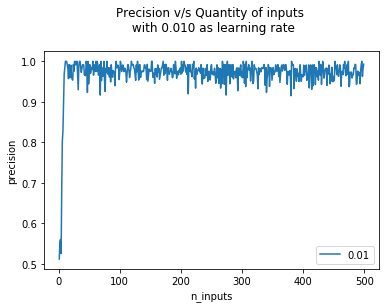

In [3]:
def f(x):
    """Definition of an 'f' function to be used in the training of the
    Sigmoid function."""
    return (-2 * x) - 3

def precision_vs_inputs_plot(learning_rates, n_inputs):
    x_data = range(1, n_inputs)
    w_1 = np.random.uniform(0.0001, 2)
    w_1 = w_1 if random.random() < 0.5 else -w_1
    w_2 = np.random.uniform(0.0001, 2)
    w_2 = w_2 if random.random() < 0.5 else -w_2
    b = np.random.uniform(0.0001, 2)
    b = b if random.random() < 0.5 else -b
    w = [w_1, w_2]
    for lr in learning_rates:  
        y_precision = []
        for n in range(1, n_inputs):
            my_neuron = SigmoidNeuron(w, b)
            my_neuron.train(lr, n)
            precision = my_neuron.test()
            y_precision.append(precision)
        title = 'Precision v/s Quantity of inputs \n with {:.3f} as learning rate'.format(lr)
        plt.title(title, loc='center', pad=20.0)
        plt.plot(x_data, y_precision, label=str(lr))
        plt.xlabel('n_inputs')
        plt.ylabel('precision')
        plt.legend()
        plt.show()

np.random.seed(42)
precision_vs_inputs_plot([0.01], 500)

In [8]:
import unittest

class SigmoidNeuronTestCase(unittest.TestCase):
    
    def setUp(self):
        w_1 = np.random.uniform(0.0001, 2)
        self.w_1_before = w_1 if random.random() < 0.5 else -w_1
        w_2 = np.random.uniform(0.0001, 2)
        self.w_2_before = w_2 if random.random() < 0.5 else -w_2
        b = np.random.uniform(0.0001, 2)
        self.b_before = b if random.random() < 0.5 else -b
        w = [self.w_1_before, self.w_2_before]
        self.OR = create_OR()
        self.AND = create_AND()
        self.NAND = create_NAND()
        self.sigmoidNeuron = SigmoidNeuron(w, self.b_before)
        self.lr = 0.01
        self.n_inputs = 100
    
    def test_preceptron_initializer(self):
        self.assertEqual(self.OR.w[0], 1)
        self.assertEqual(self.OR.w[1], 1)
        self.assertEqual(self.OR.b, -0.5)
        self.assertEqual(self.AND.w[0], 1)
        self.assertEqual(self.AND.w[1], 1)
        self.assertEqual(self.AND.b, -1.5)
        self.assertEqual(self.NAND.w[0], -2)
        self.assertEqual(self.NAND.w[1], -2)
        self.assertEqual(self.NAND.b, 3)
    
    def test_or_operator(self):
        self.assertEqual(self.OR.op(0,0), 0)
        self.assertEqual(self.OR.op(0,1), 1)
        self.assertEqual(self.OR.op(1,0), 1)
        self.assertEqual(self.OR.op(1,1), 1)
        
    def test_and_operator(self):
        self.assertEqual(self.AND.op(0,0), 0)
        self.assertEqual(self.AND.op(0,1), 0)
        self.assertEqual(self.AND.op(1,0), 0)
        self.assertEqual(self.AND.op(1,1), 1)
        
    def test_nand_operator(self):
        self.assertEqual(self.NAND.op(0,0), 1)
        self.assertEqual(self.NAND.op(0,1), 1)
        self.assertEqual(self.NAND.op(1,0), 1)
        self.assertEqual(self.NAND.op(1,1), 0)
        
    def test_summing_numbers(self):
        self.assertEqual(summing_numbers(0, 0), (0, 0))
        self.assertEqual(summing_numbers(0, 1), (1, 0))
        self.assertEqual(summing_numbers(1, 0), (1, 0))
        self.assertEqual(summing_numbers(1, 1), (0, 1))
        
    def test_train_perceptron(self):
        self.sigmoidNeuron.train(self.lr, self.n_inputs)
        self.assertNotEqual(self.w_1_before, self.sigmoidNeuron.w[0])
        self.assertNotEqual(self.w_2_before, self.sigmoidNeuron.w[1])
        self.assertNotEqual(self.b_before, self.sigmoidNeuron.b)    
        
    def test_test_perceptron(self):
        precision = self.sigmoidNeuron.test()
        self.assertNotEqual(precision, 0)
        self.assertGreater(precision, 0)
        self.assertLessEqual(precision, 1)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.009s

OK
